In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
trainpath = '../datasets/CAL500/CAL500-train-mvmd.mat'
testpath = '../datasets/CAL500/CAL500-test-mvmd.mat'

train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], np.array(train_['labels'])

test_ = loadmat(testpath)
test_data, test_labels = test_['transformed_test_data'], np.array(test_['labels'])

a = train_data.max(axis=0)
b = train_data.min(axis=0)

# delete_indices = [0, 12, 15]
# train_labels = np.delete(train_labels, delete_indices, 1)
# test_labels = np.delete(test_labels, delete_indices, 1)

train_spikes = encoding(train_data, device, a, b)
test_spikes = encoding(test_data, device, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 202/202 [00:00<00:00, 8583.22it/s]

Train data shape:  (300, 1, 120)
Train labels shape:  (300, 173)
Test data shape:  (202, 1, 120)
Test labels shape:  (202, 173)


## CIFDM Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (15, 1, 120)
Train Labels shape is  (15, 9)
Classes trained are: 0 to 9


  0%|          | 1/200 [00:00<00:32,  6.12it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 4
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 1, class 0 neurons = 5
Class 4, class 1 neurons = 4, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 5
Class 8, class 1 neurons = 3, class 0 neurons = 2


100%|██████████| 200/200 [00:31<00:00,  6.27it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.371287 |
| zero_one_loss       | 0.980198 |
| one_error           | 0        |
| micro av. jaccard   | 0.235561 |
| macro av. jaccard   | 0.1307   |
| micro av. precision | 0.407843 |
| macro av. precision | 0.334837 |
| micro av. recall    | 0.358003 |
| macro av. recall    | 0.267625 |
| micro av. f1        | 0.381302 |
| macro av. f1        | 0.190258 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.371287 |
| zero_one_loss       | 0.980198 |
| one_error           | 0        |
| micro av. jaccard   | 0.235561 |
| macro av. jaccard   | 0.1307   |
| micro av. precision | 0.407843 |
| macro av. precision | 0.334837 |


  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 1, class 0 neurons = 5
Class 4, class 1 neurons = 5, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 2
Class 6, class 1 neurons = 3, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 5
Class 8, class 1 neurons = 4, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 2
Class 10, class 1 neurons = 2, class 0 neurons = 2
Class 11, class 1 neurons = 1, class 0 neurons = 2
Class 12, class 1 neurons = 1, class 0 neurons = 3
Class 13, class 1 neurons = 2, class 0 neurons = 3
Class 14, class 1 neurons = 2, class 0 neurons = 2
Class 15, class 1 neurons = 2, class 0 neurons = 2
Class 16, class 1 neurons = 1, class 0 neurons = 2
Class 17, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 200/200 [00:57<00:00,  3.49it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.267327  |
| zero_one_loss       | 0.925743  |
| one_error           | 0         |
| micro av. jaccard   | 0.0201613 |
| macro av. jaccard   | 0.0171993 |
| micro av. precision | 0.27027   |
| macro av. precision | 0.124434  |
| micro av. recall    | 0.021322  |
| macro av. recall    | 0.0201149 |
| micro av. f1        | 0.0395257 |
| macro av. f1        | 0.0324332 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 18) (202, 18)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.325358  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.175035  |
| macro av. jaccard   | 0.0751176 |
| micro av. precision | 0.395276  |
| macro av. 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 8
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 1, class 0 neurons = 6
Class 4, class 1 neurons = 6, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 2
Class 6, class 1 neurons = 3, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 5, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 3
Class 10, class 1 neurons = 2, class 0 neurons = 3
Class 11, class 1 neurons = 1, class 0 neurons = 3
Class 12, class 1 neurons = 1, class 0 neurons = 3
Class 13, class 1 neurons = 2, class 0 neurons = 4
Class 14, class 1 neurons = 2, class 0 neurons = 3
Class 15, class 1 neurons = 2, class 0 neurons = 4
Class 16, class 1 neurons = 1, class 0 neurons = 3
Class 17, class 1 neurons = 1, class 0 neurons = 2
Class 18, class 1 neurons = 2, class 0 neurons = 3
Class 19, class 1 neurons = 2, class 0 ne

100%|██████████| 200/200 [01:26<00:00,  2.32it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.315732  |
| zero_one_loss       | 0.950495  |
| one_error           | 0         |
| micro av. jaccard   | 0.0888889 |
| macro av. jaccard   | 0.0358332 |
| micro av. precision | 0.327485  |
| macro av. precision | 0.0923695 |
| micro av. recall    | 0.108738  |
| macro av. recall    | 0.0939153 |
| micro av. f1        | 0.163265  |
| macro av. f1        | 0.055266  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 27) (202, 27)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.318849  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.147549  |
| macro av. jaccard   | 0.0568656 |
| micro av. precision | 0.387887  |
| macro av. 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 8
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 1, class 0 neurons = 6
Class 4, class 1 neurons = 6, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 2
Class 6, class 1 neurons = 3, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 5, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 3
Class 10, class 1 neurons = 2, class 0 neurons = 3
Class 11, class 1 neurons = 1, class 0 neurons = 3
Class 12, class 1 neurons = 1, class 0 neurons = 3
Class 13, class 1 neurons = 2, class 0 neurons = 4
Class 14, class 1 neurons = 2, class 0 neurons = 3
Class 15, class 1 neurons = 2, class 0 neurons = 4
Class 16, class 1 neurons = 1, class 0 neurons = 3
Class 17, class 1 neurons = 1, class 0 neurons = 2
Class 18, class 1 neurons = 2, class 0 neurons = 3
Class 19, class 1 neurons = 2, class 0 ne

100%|██████████| 200/200 [01:54<00:00,  1.75it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.261826  |
| zero_one_loss       | 0.935644  |
| one_error           | 0         |
| micro av. jaccard   | 0.0775194 |
| macro av. jaccard   | 0.0422025 |
| micro av. precision | 0.434783  |
| macro av. precision | 0.155569  |
| micro av. recall    | 0.0862069 |
| macro av. recall    | 0.052451  |
| micro av. f1        | 0.143885  |
| macro av. f1        | 0.0728439 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 36) (202, 36)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.306106  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.136205  |
| macro av. jaccard   | 0.0533174 |
| micro av. precision | 0.390434  |
| macro av. 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 9
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 1, class 0 neurons = 6
Class 4, class 1 neurons = 7, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 2
Class 6, class 1 neurons = 3, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 5, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 3
Class 10, class 1 neurons = 2, class 0 neurons = 4
Class 11, class 1 neurons = 1, class 0 neurons = 5
Class 12, class 1 neurons = 1, class 0 neurons = 4
Class 13, class 1 neurons = 2, class 0 neurons = 5
Class 14, class 1 neurons = 2, class 0 neurons = 3
Class 15, class 1 neurons = 2, class 0 neurons = 4
Class 16, class 1 neurons = 1, class 0 neurons = 5
Class 17, class 1 neurons = 1, class 0 neurons = 2
Class 18, class 1 neurons = 2, class 0 neurons = 3
Class 19, class 1 neurons = 2, class 0 ne

100%|██████████| 200/200 [02:29<00:00,  1.34it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0511551 |
| zero_one_loss       | 0.391089  |
| one_error           | 0         |
| micro av. jaccard   | 0.0792079 |
| macro av. jaccard   | 0.0123457 |
| micro av. precision | 0.177778  |
| macro av. precision | 0.020202  |
| micro av. recall    | 0.125     |
| macro av. recall    | 0.0246914 |
| micro av. f1        | 0.146789  |
| macro av. f1        | 0.0222222 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 45) (202, 45)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.254015  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.123054  |
| macro av. jaccard   | 0.0376904 |
| micro av. precision | 0.375     |
| macro av. 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 2
Class 1, class 1 neurons = 1, class 0 neurons = 10
Class 2, class 1 neurons = 3, class 0 neurons = 3
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 8, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 3
Class 6, class 1 neurons = 4, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 7
Class 8, class 1 neurons = 6, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 4
Class 10, class 1 neurons = 2, class 0 neurons = 5
Class 11, class 1 neurons = 1, class 0 neurons = 6
Class 12, class 1 neurons = 1, class 0 neurons = 5
Class 13, class 1 neurons = 2, class 0 neurons = 6
Class 14, class 1 neurons = 2, class 0 neurons = 4
Class 15, class 1 neurons = 2, class 0 neurons = 5
Class 16, class 1 neurons = 1, class 0 neurons = 6
Class 17, class 1 neurons = 1, class 0 neurons = 3
Class 18, class 1 neurons = 2, class 0 neurons = 4
Class 19, class 1 neurons = 2, class 0 n

100%|██████████| 200/200 [03:02<00:00,  1.10it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0429043 |
| zero_one_loss       | 0.316832  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 54) (202, 54)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.215897  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.116985  |
| macro av. jaccard   | 0.0286029 |
| micro av. precision | 0.386139  |
| macro av. 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 2
Class 1, class 1 neurons = 1, class 0 neurons = 10
Class 2, class 1 neurons = 3, class 0 neurons = 3
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 8, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 3
Class 6, class 1 neurons = 4, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 7
Class 8, class 1 neurons = 6, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 4
Class 10, class 1 neurons = 2, class 0 neurons = 5
Class 11, class 1 neurons = 1, class 0 neurons = 6
Class 12, class 1 neurons = 1, class 0 neurons = 5
Class 13, class 1 neurons = 2, class 0 neurons = 6
Class 14, class 1 neurons = 2, class 0 neurons = 4
Class 15, class 1 neurons = 2, class 0 neurons = 5
Class 16, class 1 neurons = 1, class 0 neurons = 6
Class 17, class 1 neurons = 1, class 0 neurons = 3
Class 18, class 1 neurons = 2, class 0 neurons = 4
Class 19, class 1 neurons = 2, class 0 n

100%|██████████| 200/200 [03:31<00:00,  1.06s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0522552 |
| zero_one_loss       | 0.405941  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 63) (202, 63)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.192519  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.112962  |
| macro av. jaccard   | 0.0245167 |
| micro av. precision | 0.386139  |
| macro av. 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 2
Class 1, class 1 neurons = 1, class 0 neurons = 11
Class 2, class 1 neurons = 3, class 0 neurons = 3
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 8, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 3
Class 6, class 1 neurons = 4, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 7
Class 8, class 1 neurons = 6, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 4
Class 10, class 1 neurons = 2, class 0 neurons = 5
Class 11, class 1 neurons = 1, class 0 neurons = 6
Class 12, class 1 neurons = 1, class 0 neurons = 5
Class 13, class 1 neurons = 2, class 0 neurons = 6
Class 14, class 1 neurons = 2, class 0 neurons = 4
Class 15, class 1 neurons = 2, class 0 neurons = 5
Class 16, class 1 neurons = 1, class 0 neurons = 6
Class 17, class 1 neurons = 1, class 0 neurons = 3
Class 18, class 1 neurons = 2, class 0 neurons = 5
Class 19, class 1 neurons = 2, class 0 n

100%|██████████| 200/200 [04:40<00:00,  1.40s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.222222 |
| zero_one_loss       | 0.910891 |
| one_error           | 0        |
| micro av. jaccard   | 0.303448 |
| macro av. jaccard   | 0.107157 |
| micro av. precision | 0.488889 |
| macro av. precision | 0.148255 |
| micro av. recall    | 0.444444 |
| macro av. recall    | 0.195157 |
| micro av. f1        | 0.465608 |
| macro av. f1        | 0.149005 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 72) (202, 72)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.196232  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.14602   |
| macro av. jaccard   | 0.0348468 |
| micro av. precision | 0.417808  |
| macro av. precision | 0

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 2
Class 1, class 1 neurons = 1, class 0 neurons = 12
Class 2, class 1 neurons = 3, class 0 neurons = 3
Class 3, class 1 neurons = 1, class 0 neurons = 8
Class 4, class 1 neurons = 9, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 3
Class 6, class 1 neurons = 4, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 8
Class 8, class 1 neurons = 6, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 4
Class 10, class 1 neurons = 2, class 0 neurons = 6
Class 11, class 1 neurons = 1, class 0 neurons = 7
Class 12, class 1 neurons = 1, class 0 neurons = 6
Class 13, class 1 neurons = 2, class 0 neurons = 7
Class 14, class 1 neurons = 2, class 0 neurons = 4
Class 15, class 1 neurons = 2, class 0 neurons = 6
Class 16, class 1 neurons = 1, class 0 neurons = 7
Class 17, class 1 neurons = 1, class 0 neurons = 4
Class 18, class 1 neurons = 2, class 0 neurons = 6
Class 19, class 1 neurons = 2, class 0 n

100%|██████████| 200/200 [05:53<00:00,  1.77s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.174367  |
| zero_one_loss       | 0.811881  |
| one_error           | 0         |
| micro av. jaccard   | 0.267898  |
| macro av. jaccard   | 0.0788827 |
| micro av. precision | 0.462151  |
| macro av. precision | 0.119006  |
| micro av. recall    | 0.389262  |
| macro av. recall    | 0.136495  |
| micro av. f1        | 0.422587  |
| macro av. f1        | 0.11187   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 81) (202, 81)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.194108  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.163991  |
| macro av. jaccard   | 0.0397512 |
| micro av. precision | 0.426129  |
| macro av. 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 2
Class 1, class 1 neurons = 1, class 0 neurons = 13
Class 2, class 1 neurons = 3, class 0 neurons = 3
Class 3, class 1 neurons = 1, class 0 neurons = 8
Class 4, class 1 neurons = 9, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 3
Class 6, class 1 neurons = 4, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 8
Class 8, class 1 neurons = 6, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 4
Class 10, class 1 neurons = 2, class 0 neurons = 6
Class 11, class 1 neurons = 1, class 0 neurons = 7
Class 12, class 1 neurons = 1, class 0 neurons = 6
Class 13, class 1 neurons = 2, class 0 neurons = 7
Class 14, class 1 neurons = 2, class 0 neurons = 4
Class 15, class 1 neurons = 2, class 0 neurons = 6
Class 16, class 1 neurons = 1, class 0 neurons = 7
Class 17, class 1 neurons = 1, class 0 neurons = 4
Class 18, class 1 neurons = 2, class 0 neurons = 6
Class 19, class 1 neurons = 2, class 0 n

100%|██████████| 200/200 [06:28<00:00,  1.94s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0583058 |
| zero_one_loss       | 0.391089  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 90) (202, 90)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.182508  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.167587  |
| macro av. jaccard   | 0.0368962 |
| micro av. precision | 0.420655  |
| macro av. 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 3
Class 1, class 1 neurons = 1, class 0 neurons = 15
Class 2, class 1 neurons = 3, class 0 neurons = 4
Class 3, class 1 neurons = 1, class 0 neurons = 10
Class 4, class 1 neurons = 11, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 4
Class 6, class 1 neurons = 5, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 10
Class 8, class 1 neurons = 8, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 5
Class 10, class 1 neurons = 2, class 0 neurons = 8
Class 11, class 1 neurons = 1, class 0 neurons = 10
Class 12, class 1 neurons = 1, class 0 neurons = 8
Class 13, class 1 neurons = 2, class 0 neurons = 8
Class 14, class 1 neurons = 2, class 0 neurons = 6
Class 15, class 1 neurons = 2, class 0 neurons = 8
Class 16, class 1 neurons = 1, class 0 neurons = 10
Class 17, class 1 neurons = 1, class 0 neurons = 6
Class 18, class 1 neurons = 2, class 0 neurons = 7
Class 19, class 1 neurons = 2, clas

100%|██████████| 200/200 [08:14<00:00,  2.47s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.267327  |
| zero_one_loss       | 0.955446  |
| one_error           | 0         |
| micro av. jaccard   | 0.162069  |
| macro av. jaccard   | 0.0562572 |
| micro av. precision | 0.460784  |
| macro av. precision | 0.240741  |
| micro av. recall    | 0.2       |
| macro av. recall    | 0.112905  |
| micro av. f1        | 0.278932  |
| macro av. f1        | 0.0801921 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 99) (202, 99)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.190819  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.167902  |
| macro av. jaccard   | 0.0389177 |
| micro av. precision | 0.423077  |
| macro av. 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 3
Class 1, class 1 neurons = 1, class 0 neurons = 16
Class 2, class 1 neurons = 3, class 0 neurons = 4
Class 3, class 1 neurons = 1, class 0 neurons = 10
Class 4, class 1 neurons = 11, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 4
Class 6, class 1 neurons = 5, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 10
Class 8, class 1 neurons = 8, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 5
Class 10, class 1 neurons = 2, class 0 neurons = 8
Class 11, class 1 neurons = 1, class 0 neurons = 11
Class 12, class 1 neurons = 1, class 0 neurons = 9
Class 13, class 1 neurons = 2, class 0 neurons = 8
Class 14, class 1 neurons = 2, class 0 neurons = 6
Class 15, class 1 neurons = 2, class 0 neurons = 9
Class 16, class 1 neurons = 1, class 0 neurons = 11
Class 17, class 1 neurons = 1, class 0 neurons = 7
Class 18, class 1 neurons = 2, class 0 neurons = 7
Class 19, class 1 neurons = 2, clas

100%|██████████| 200/200 [07:19<00:00,  2.20s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.224972  |
| zero_one_loss       | 0.886139  |
| one_error           | 0         |
| micro av. jaccard   | 0.229755  |
| macro av. jaccard   | 0.0767965 |
| micro av. precision | 0.535088  |
| macro av. precision | 0.239578  |
| micro av. recall    | 0.287059  |
| macro av. recall    | 0.125626  |
| micro av. f1        | 0.37366   |
| macro av. f1        | 0.106536  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 108) (202, 108)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.193436  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.174976  |
| macro av. jaccard   | 0.0427285 |
| micro av. precision | 0.436798  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 3
Class 1, class 1 neurons = 1, class 0 neurons = 16
Class 2, class 1 neurons = 3, class 0 neurons = 4
Class 3, class 1 neurons = 1, class 0 neurons = 11
Class 4, class 1 neurons = 12, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 4
Class 6, class 1 neurons = 5, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 11
Class 8, class 1 neurons = 8, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 5
Class 10, class 1 neurons = 2, class 0 neurons = 8
Class 11, class 1 neurons = 1, class 0 neurons = 12
Class 12, class 1 neurons = 1, class 0 neurons = 10
Class 13, class 1 neurons = 2, class 0 neurons = 8
Class 14, class 1 neurons = 2, class 0 neurons = 6
Class 15, class 1 neurons = 2, class 0 neurons = 10
Class 16, class 1 neurons = 1, class 0 neurons = 12
Class 17, class 1 neurons = 1, class 0 neurons = 8
Class 18, class 1 neurons = 2, class 0 neurons = 8
Class 19, class 1 neurons = 2, cl

100%|██████████| 200/200 [08:09<00:00,  2.45s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.245875 |
| zero_one_loss       | 0.955446 |
| one_error           | 0        |
| micro av. jaccard   | 0.471006 |
| macro av. jaccard   | 0.229644 |
| micro av. precision | 0.70318  |
| macro av. precision | 0.395907 |
| micro av. recall    | 0.587888 |
| macro av. recall    | 0.312021 |
| micro av. f1        | 0.640386 |
| macro av. f1        | 0.276266 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 117) (202, 117)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.196877  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.216799  |
| macro av. jaccard   | 0.0562452 |
| micro av. precision | 0.497105  |
| macro av. precision |

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 3
Class 1, class 1 neurons = 1, class 0 neurons = 17
Class 2, class 1 neurons = 3, class 0 neurons = 4
Class 3, class 1 neurons = 1, class 0 neurons = 11
Class 4, class 1 neurons = 12, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 4
Class 6, class 1 neurons = 5, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 11
Class 8, class 1 neurons = 8, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 5
Class 10, class 1 neurons = 2, class 0 neurons = 8
Class 11, class 1 neurons = 1, class 0 neurons = 14
Class 12, class 1 neurons = 1, class 0 neurons = 11
Class 13, class 1 neurons = 2, class 0 neurons = 8
Class 14, class 1 neurons = 2, class 0 neurons = 6
Class 15, class 1 neurons = 2, class 0 neurons = 10
Class 16, class 1 neurons = 1, class 0 neurons = 14
Class 17, class 1 neurons = 1, class 0 neurons = 8
Class 18, class 1 neurons = 2, class 0 neurons = 8
Class 19, class 1 neurons = 2, cl

100%|██████████| 200/200 [08:54<00:00,  2.67s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.128163  |
| zero_one_loss       | 0.757426  |
| one_error           | 0         |
| micro av. jaccard   | 0.117424  |
| macro av. jaccard   | 0.0219391 |
| micro av. precision | 0.226277  |
| macro av. precision | 0.0255144 |
| micro av. recall    | 0.196203  |
| macro av. recall    | 0.0649895 |
| micro av. f1        | 0.210169  |
| macro av. f1        | 0.036643  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 126) (202, 126)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.191694  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.214711  |
| macro av. jaccard   | 0.0536863 |
| micro av. precision | 0.484915  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 4
Class 1, class 1 neurons = 1, class 0 neurons = 18
Class 2, class 1 neurons = 3, class 0 neurons = 5
Class 3, class 1 neurons = 1, class 0 neurons = 12
Class 4, class 1 neurons = 13, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 5
Class 6, class 1 neurons = 6, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 12
Class 8, class 1 neurons = 9, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 6
Class 10, class 1 neurons = 2, class 0 neurons = 9
Class 11, class 1 neurons = 1, class 0 neurons = 15
Class 12, class 1 neurons = 1, class 0 neurons = 12
Class 13, class 1 neurons = 2, class 0 neurons = 9
Class 14, class 1 neurons = 2, class 0 neurons = 7
Class 15, class 1 neurons = 2, class 0 neurons = 11
Class 16, class 1 neurons = 1, class 0 neurons = 15
Class 17, class 1 neurons = 1, class 0 neurons = 9
Class 18, class 1 neurons = 2, class 0 neurons = 9
Class 19, class 1 neurons = 2, cl

100%|██████████| 200/200 [09:52<00:00,  2.96s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0451045 |
| zero_one_loss       | 0.336634  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 135) (202, 135)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.182802  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.213846  |
| macro av. jaccard   | 0.0499486 |
| micro av. precision | 0.480681  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 4
Class 1, class 1 neurons = 1, class 0 neurons = 18
Class 2, class 1 neurons = 3, class 0 neurons = 5
Class 3, class 1 neurons = 1, class 0 neurons = 12
Class 4, class 1 neurons = 13, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 5
Class 6, class 1 neurons = 6, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 12
Class 8, class 1 neurons = 9, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 6
Class 10, class 1 neurons = 2, class 0 neurons = 9
Class 11, class 1 neurons = 1, class 0 neurons = 15
Class 12, class 1 neurons = 1, class 0 neurons = 12
Class 13, class 1 neurons = 2, class 0 neurons = 9
Class 14, class 1 neurons = 2, class 0 neurons = 7
Class 15, class 1 neurons = 2, class 0 neurons = 11
Class 16, class 1 neurons = 1, class 0 neurons = 15
Class 17, class 1 neurons = 1, class 0 neurons = 9
Class 18, class 1 neurons = 2, class 0 neurons = 9
Class 19, class 1 neurons = 2, cl

100%|██████████| 200/200 [10:17<00:00,  3.09s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0506051 |
| zero_one_loss       | 0.346535  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 144) (202, 144)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.174539  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.211279  |
| macro av. jaccard   | 0.0469117 |
| micro av. precision | 0.480735  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 4
Class 1, class 1 neurons = 1, class 0 neurons = 20
Class 2, class 1 neurons = 3, class 0 neurons = 6
Class 3, class 1 neurons = 1, class 0 neurons = 14
Class 4, class 1 neurons = 15, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 6
Class 6, class 1 neurons = 7, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 14
Class 8, class 1 neurons = 10, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 7
Class 10, class 1 neurons = 2, class 0 neurons = 10
Class 11, class 1 neurons = 1, class 0 neurons = 17
Class 12, class 1 neurons = 1, class 0 neurons = 14
Class 13, class 1 neurons = 2, class 0 neurons = 10
Class 14, class 1 neurons = 2, class 0 neurons = 8
Class 15, class 1 neurons = 2, class 0 neurons = 12
Class 16, class 1 neurons = 1, class 0 neurons = 18
Class 17, class 1 neurons = 1, class 0 neurons = 10
Class 18, class 1 neurons = 2, class 0 neurons = 11
Class 19, class 1 neurons = 

100%|██████████| 200/200 [11:51<00:00,  3.56s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.0682068  |
| zero_one_loss       | 0.460396   |
| one_error           | 0          |
| micro av. jaccard   | 0.008      |
| macro av. jaccard   | 0.00396825 |
| micro av. precision | 0.25       |
| macro av. precision | 0.0555556  |
| micro av. recall    | 0.00819672 |
| macro av. recall    | 0.00411523 |
| micro av. f1        | 0.015873   |
| macro av. f1        | 0.00766284 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 153) (202, 153)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.168317  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.207254  |
| macro av. jaccard   | 0.044305  |
| micro av. precision | 0.480226 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 4
Class 1, class 1 neurons = 1, class 0 neurons = 23
Class 2, class 1 neurons = 3, class 0 neurons = 6
Class 3, class 1 neurons = 1, class 0 neurons = 15
Class 4, class 1 neurons = 16, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 6
Class 6, class 1 neurons = 7, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 15
Class 8, class 1 neurons = 11, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 7
Class 10, class 1 neurons = 2, class 0 neurons = 11
Class 11, class 1 neurons = 1, class 0 neurons = 18
Class 12, class 1 neurons = 1, class 0 neurons = 15
Class 13, class 1 neurons = 2, class 0 neurons = 11
Class 14, class 1 neurons = 2, class 0 neurons = 9
Class 15, class 1 neurons = 2, class 0 neurons = 13
Class 16, class 1 neurons = 1, class 0 neurons = 19
Class 17, class 1 neurons = 1, class 0 neurons = 11
Class 18, class 1 neurons = 2, class 0 neurons = 12
Class 19, class 1 neurons = 

100%|██████████| 200/200 [13:11<00:00,  3.96s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0308031 |
| zero_one_loss       | 0.267327  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 162) (202, 162)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.160616  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.205442  |
| macro av. jaccard   | 0.0416231 |
| micro av. precision | 0.480552  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 4
Class 1, class 1 neurons = 1, class 0 neurons = 24
Class 2, class 1 neurons = 3, class 0 neurons = 6
Class 3, class 1 neurons = 1, class 0 neurons = 16
Class 4, class 1 neurons = 17, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 6
Class 6, class 1 neurons = 7, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 16
Class 8, class 1 neurons = 11, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 7
Class 10, class 1 neurons = 2, class 0 neurons = 11
Class 11, class 1 neurons = 1, class 0 neurons = 19
Class 12, class 1 neurons = 1, class 0 neurons = 16
Class 13, class 1 neurons = 2, class 0 neurons = 11
Class 14, class 1 neurons = 2, class 0 neurons = 9
Class 15, class 1 neurons = 2, class 0 neurons = 13
Class 16, class 1 neurons = 1, class 0 neurons = 20
Class 17, class 1 neurons = 1, class 0 neurons = 11
Class 18, class 1 neurons = 2, class 0 neurons = 12
Class 19, class 1 neurons = 

100%|██████████| 200/200 [14:11<00:00,  4.26s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 9) (202, 9)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0473047 |
| zero_one_loss       | 0.346535  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 171) (202, 171)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.154652  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.202806  |
| macro av. jaccard   | 0.0394324 |
| micro av. precision | 0.479873  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 4
Class 1, class 1 neurons = 1, class 0 neurons = 25
Class 2, class 1 neurons = 3, class 0 neurons = 6
Class 3, class 1 neurons = 1, class 0 neurons = 16
Class 4, class 1 neurons = 17, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 6
Class 6, class 1 neurons = 7, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 16
Class 8, class 1 neurons = 11, class 0 neurons = 3
Class 9, class 1 neurons = 2, class 0 neurons = 7
Class 10, class 1 neurons = 2, class 0 neurons = 11
Class 11, class 1 neurons = 1, class 0 neurons = 19
Class 12, class 1 neurons = 1, class 0 neurons = 16
Class 13, class 1 neurons = 2, class 0 neurons = 11
Class 14, class 1 neurons = 2, class 0 neurons = 9
Class 15, class 1 neurons = 2, class 0 neurons = 13
Class 16, class 1 neurons = 1, class 0 neurons = 20
Class 17, class 1 neurons = 1, class 0 neurons = 11
Class 18, class 1 neurons = 2, class 0 neurons = 12
Class 19, class 1 neurons = 

100%|██████████| 200/200 [14:27<00:00,  4.34s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0173267 |
| zero_one_loss       | 0.0346535 |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 173) (202, 173)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.153036  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.202624  |
| macro av. jaccard   | 0.0389766 |
| micro av. precision | 0.479703  |
| macro av

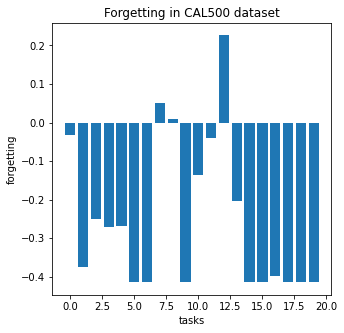

In [3]:
hparams_dict = {
    'inputs': 120,
    'outputs': 173,
    'time_constant': 300,
    'alpha_a': 0.38,
    'alpha_m': 0.07, #0.07
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 200, #2500
    'print_every': 500,
    'name': 'CAL500',
    'tasks': {'samples': [15]*20, 'labels': [9]*19 + [2]},
    'seed': 2,
    'add_extra_neuron': True,
    'ckpt_dir': './checkpoints/CAL500/mvmd',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (60, 1, 120)
Train Labels shape is  (60, 34)
Classes trained are: 0 to 34


  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 9, class 0 neurons = 3
Class 1, class 1 neurons = 4, class 0 neurons = 8
Class 2, class 1 neurons = 4, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 9
Class 4, class 1 neurons = 7, class 0 neurons = 5
Class 5, class 1 neurons = 6, class 0 neurons = 6
Class 6, class 1 neurons = 2, class 0 neurons = 8
Class 7, class 1 neurons = 1, class 0 neurons = 10
Class 8, class 1 neurons = 6, class 0 neurons = 5
Class 9, class 1 neurons = 2, class 0 neurons = 9
Class 10, class 1 neurons = 4, class 0 neurons = 7
Class 11, class 1 neurons = 3, class 0 neurons = 8
Class 12, class 1 neurons = 1, class 0 neurons = 10
Class 13, class 1 neurons = 3, class 0 neurons = 10
Class 14, class 1 neurons = 7, class 0 neurons = 3
Class 15, class 1 neurons = 4, class 0 neurons = 9
Class 16, class 1 neurons = 6, class 0 neurons = 5
Class 17, class 1 neurons = 3, class 0 neurons = 8
Class 18, class 1 neurons = 3, class 0 neurons = 8
Class 19, class 1 neurons = 4, class 0

100%|██████████| 200/200 [11:20<00:00,  3.40s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 34) (202, 34)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.263395  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.133206  |
| macro av. jaccard   | 0.0493232 |
| micro av. precision | 0.586498  |
| macro av. precision | 0.292233  |
| micro av. recall    | 0.147012  |
| macro av. recall    | 0.0740487 |
| micro av. f1        | 0.235095  |
| macro av. f1        | 0.0707077 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 34) (202, 34)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.263395  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.133206  |
| macro av. jaccard   | 0.0493232 |
| micro av. precision | 0.586498  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 12, class 0 neurons = 3
Class 1, class 1 neurons = 4, class 0 neurons = 9
Class 2, class 1 neurons = 4, class 0 neurons = 9
Class 3, class 1 neurons = 1, class 0 neurons = 10
Class 4, class 1 neurons = 8, class 0 neurons = 5
Class 5, class 1 neurons = 8, class 0 neurons = 8
Class 6, class 1 neurons = 2, class 0 neurons = 11
Class 7, class 1 neurons = 1, class 0 neurons = 12
Class 8, class 1 neurons = 7, class 0 neurons = 6
Class 9, class 1 neurons = 2, class 0 neurons = 12
Class 10, class 1 neurons = 5, class 0 neurons = 10
Class 11, class 1 neurons = 3, class 0 neurons = 10
Class 12, class 1 neurons = 1, class 0 neurons = 13
Class 13, class 1 neurons = 3, class 0 neurons = 11
Class 14, class 1 neurons = 9, class 0 neurons = 5
Class 15, class 1 neurons = 4, class 0 neurons = 12
Class 16, class 1 neurons = 7, class 0 neurons = 7
Class 17, class 1 neurons = 3, class 0 neurons = 9
Class 18, class 1 neurons = 3, class 0 neurons = 12
Class 19, class 1 neurons = 4,

100%|██████████| 200/200 [22:57<00:00,  6.89s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 34) (202, 34)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0746942 |
| zero_one_loss       | 0.990099  |
| one_error           | 0         |
| micro av. jaccard   | 0.145     |
| macro av. jaccard   | 0.0136955 |
| micro av. precision | 0.465241  |
| macro av. precision | 0.0430843 |
| micro av. recall    | 0.174     |
| macro av. recall    | 0.0279461 |
| micro av. f1        | 0.253275  |
| macro av. f1        | 0.0191542 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 68) (202, 68)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.169554  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.123777  |
| macro av. jaccard   | 0.0247058 |
| micro av. precision | 0.552013  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 15, class 0 neurons = 3
Class 1, class 1 neurons = 4, class 0 neurons = 10
Class 2, class 1 neurons = 4, class 0 neurons = 10
Class 3, class 1 neurons = 1, class 0 neurons = 14
Class 4, class 1 neurons = 9, class 0 neurons = 5
Class 5, class 1 neurons = 8, class 0 neurons = 10
Class 6, class 1 neurons = 2, class 0 neurons = 14
Class 7, class 1 neurons = 1, class 0 neurons = 17
Class 8, class 1 neurons = 7, class 0 neurons = 9
Class 9, class 1 neurons = 2, class 0 neurons = 15
Class 10, class 1 neurons = 5, class 0 neurons = 12
Class 11, class 1 neurons = 3, class 0 neurons = 13
Class 12, class 1 neurons = 1, class 0 neurons = 18
Class 13, class 1 neurons = 3, class 0 neurons = 12
Class 14, class 1 neurons = 9, class 0 neurons = 6
Class 15, class 1 neurons = 4, class 0 neurons = 15
Class 16, class 1 neurons = 7, class 0 neurons = 8
Class 17, class 1 neurons = 3, class 0 neurons = 10
Class 18, class 1 neurons = 3, class 0 neurons = 15
Class 19, class 1 neurons 

100%|██████████| 200/200 [39:18<00:00, 11.79s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 34) (202, 34)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.173267  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.174757  |
| macro av. jaccard   | 0.0458348 |
| micro av. precision | 0.598575  |
| macro av. precision | 0.129783  |
| micro av. recall    | 0.197958  |
| macro av. recall    | 0.063274  |
| micro av. f1        | 0.297521  |
| macro av. f1        | 0.0637478 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 102) (202, 102)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.170841  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.142509  |
| macro av. jaccard   | 0.0314624 |
| micro av. precision | 0.570175  |
| macro 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 17, class 0 neurons = 3
Class 1, class 1 neurons = 4, class 0 neurons = 11
Class 2, class 1 neurons = 4, class 0 neurons = 11
Class 3, class 1 neurons = 1, class 0 neurons = 16
Class 4, class 1 neurons = 10, class 0 neurons = 5
Class 5, class 1 neurons = 8, class 0 neurons = 11
Class 6, class 1 neurons = 2, class 0 neurons = 15
Class 7, class 1 neurons = 1, class 0 neurons = 19
Class 8, class 1 neurons = 7, class 0 neurons = 10
Class 9, class 1 neurons = 2, class 0 neurons = 16
Class 10, class 1 neurons = 5, class 0 neurons = 14
Class 11, class 1 neurons = 3, class 0 neurons = 14
Class 12, class 1 neurons = 1, class 0 neurons = 20
Class 13, class 1 neurons = 3, class 0 neurons = 13
Class 14, class 1 neurons = 9, class 0 neurons = 7
Class 15, class 1 neurons = 4, class 0 neurons = 16
Class 16, class 1 neurons = 7, class 0 neurons = 9
Class 17, class 1 neurons = 3, class 0 neurons = 11
Class 18, class 1 neurons = 3, class 0 neurons = 16
Class 19, class 1 neuron

100%|██████████| 200/200 [53:59<00:00, 16.20s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 34) (202, 34)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.139779  |
| zero_one_loss       | 0.99505   |
| one_error           | 0         |
| micro av. jaccard   | 0.352664  |
| macro av. jaccard   | 0.0797476 |
| micro av. precision | 0.663706  |
| macro av. precision | 0.137935  |
| micro av. recall    | 0.429392  |
| macro av. recall    | 0.115     |
| micro av. f1        | 0.521436  |
| macro av. f1        | 0.0983352 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 136) (202, 136)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.162857  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.187579  |
| macro av. jaccard   | 0.0394669 |
| micro av. precision | 0.62304   |
| macro 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 21, class 0 neurons = 3
Class 1, class 1 neurons = 4, class 0 neurons = 12
Class 2, class 1 neurons = 4, class 0 neurons = 11
Class 3, class 1 neurons = 1, class 0 neurons = 20
Class 4, class 1 neurons = 11, class 0 neurons = 5
Class 5, class 1 neurons = 8, class 0 neurons = 11
Class 6, class 1 neurons = 2, class 0 neurons = 18
Class 7, class 1 neurons = 1, class 0 neurons = 23
Class 8, class 1 neurons = 7, class 0 neurons = 12
Class 9, class 1 neurons = 2, class 0 neurons = 18
Class 10, class 1 neurons = 5, class 0 neurons = 15
Class 11, class 1 neurons = 3, class 0 neurons = 15
Class 12, class 1 neurons = 1, class 0 neurons = 26
Class 13, class 1 neurons = 3, class 0 neurons = 14
Class 14, class 1 neurons = 9, class 0 neurons = 7
Class 15, class 1 neurons = 4, class 0 neurons = 18
Class 16, class 1 neurons = 7, class 0 neurons = 9
Class 17, class 1 neurons = 3, class 0 neurons = 13
Class 18, class 1 neurons = 3, class 0 neurons = 17
Class 19, class 1 neuron

100%|██████████| 200/200 [1:15:06<00:00, 22.53s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 37) (202, 37)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0469628 |
| zero_one_loss       | 0.886139  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 173) (202, 173)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.138356  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.172514  |
| macro av. jaccard   | 0.0291665 |
| micro av. precision | 0.622991  |
| macro 

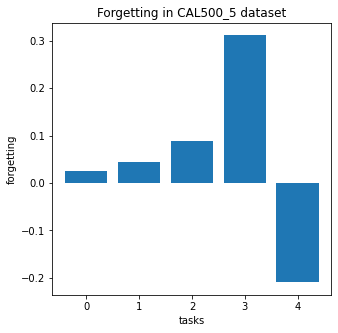

In [3]:
hparams_dict = {
    'inputs': 120,
    'outputs': 173,
    'time_constant': 300,
    'alpha_a': 0.38,
    'alpha_m': 0.07, #0.07
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 200, #2500
    'print_every': 500,
    'name': 'CAL500_5',
    'tasks': {'samples': [60]*5, 'labels': [34]*4 + [37]},
    'seed': 2,
    'add_extra_neuron': True,
    'ckpt_dir': './checkpoints/CAL500/mvmd',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

del net, hparams_dict

Training and Evaluating on task 1
Train data shape is  (30, 1, 120)
Train Labels shape is  (30, 18)
Classes trained are: 0 to 18


  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 6, class 0 neurons = 2
Class 1, class 1 neurons = 2, class 0 neurons = 6
Class 2, class 1 neurons = 4, class 0 neurons = 4
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 6, class 0 neurons = 2
Class 5, class 1 neurons = 6, class 0 neurons = 3
Class 6, class 1 neurons = 2, class 0 neurons = 6
Class 7, class 1 neurons = 1, class 0 neurons = 7
Class 8, class 1 neurons = 4, class 0 neurons = 4
Class 9, class 1 neurons = 2, class 0 neurons = 6
Class 10, class 1 neurons = 4, class 0 neurons = 5
Class 11, class 1 neurons = 2, class 0 neurons = 6
Class 12, class 1 neurons = 1, class 0 neurons = 7
Class 13, class 1 neurons = 2, class 0 neurons = 7
Class 14, class 1 neurons = 5, class 0 neurons = 2
Class 15, class 1 neurons = 2, class 0 neurons = 6
Class 16, class 1 neurons = 4, class 0 neurons = 4
Class 17, class 1 neurons = 3, class 0 neurons = 5


 34%|███▍      | 69/200 [00:53<01:38,  1.32it/s]

100%|██████████| 200/200 [02:31<00:00,  1.32it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 18) (202, 18)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.274477 |
| zero_one_loss       | 0.99505  |
| one_error           | 0        |
| micro av. jaccard   | 0.171096 |
| macro av. jaccard   | 0.066902 |
| micro av. precision | 0.572222 |
| macro av. precision | 0.240438 |
| micro av. recall    | 0.19619  |
| macro av. recall    | 0.100657 |
| micro av. f1        | 0.292199 |
| macro av. f1        | 0.093994 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 18) (202, 18)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.274477 |
| zero_one_loss       | 0.99505  |
| one_error           | 0        |
| micro av. jaccard   | 0.171096 |
| macro av. jaccard   | 0.066902 |
| micro av. precision | 0.572222 |
| macro av. precision | 0.24043

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 8, class 0 neurons = 5
Class 1, class 1 neurons = 2, class 0 neurons = 7
Class 2, class 1 neurons = 4, class 0 neurons = 4
Class 3, class 1 neurons = 1, class 0 neurons = 8
Class 4, class 1 neurons = 7, class 0 neurons = 2
Class 5, class 1 neurons = 6, class 0 neurons = 4
Class 6, class 1 neurons = 2, class 0 neurons = 8
Class 7, class 1 neurons = 1, class 0 neurons = 8
Class 8, class 1 neurons = 4, class 0 neurons = 7
Class 9, class 1 neurons = 2, class 0 neurons = 7
Class 10, class 1 neurons = 4, class 0 neurons = 5
Class 11, class 1 neurons = 2, class 0 neurons = 7
Class 12, class 1 neurons = 1, class 0 neurons = 8
Class 13, class 1 neurons = 2, class 0 neurons = 8
Class 14, class 1 neurons = 5, class 0 neurons = 3
Class 15, class 1 neurons = 2, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 4
Class 17, class 1 neurons = 3, class 0 neurons = 5
Class 18, class 1 neurons = 3, class 0 neurons = 7
Class 19, class 1 neurons = 3, class 0 ne

100%|██████████| 200/200 [04:53<00:00,  1.47s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 18) (202, 18)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.289329  |
| zero_one_loss       | 0.99505   |
| one_error           | 0         |
| micro av. jaccard   | 0.0780018 |
| macro av. jaccard   | 0.0371539 |
| micro av. precision | 0.354582  |
| macro av. precision | 0.220248  |
| micro av. recall    | 0.0909091 |
| macro av. recall    | 0.0713124 |
| micro av. f1        | 0.144715  |
| macro av. f1        | 0.0614038 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 36) (202, 36)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.284378  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.0993031 |
| macro av. jaccard   | 0.0388545 |
| micro av. precision | 0.460606  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 11, class 0 neurons = 6
Class 1, class 1 neurons = 2, class 0 neurons = 9
Class 2, class 1 neurons = 4, class 0 neurons = 5
Class 3, class 1 neurons = 1, class 0 neurons = 9
Class 4, class 1 neurons = 9, class 0 neurons = 2
Class 5, class 1 neurons = 6, class 0 neurons = 5
Class 6, class 1 neurons = 2, class 0 neurons = 10
Class 7, class 1 neurons = 1, class 0 neurons = 9
Class 8, class 1 neurons = 4, class 0 neurons = 9
Class 9, class 1 neurons = 2, class 0 neurons = 8
Class 10, class 1 neurons = 4, class 0 neurons = 7
Class 11, class 1 neurons = 2, class 0 neurons = 8
Class 12, class 1 neurons = 1, class 0 neurons = 9
Class 13, class 1 neurons = 2, class 0 neurons = 9
Class 14, class 1 neurons = 5, class 0 neurons = 4
Class 15, class 1 neurons = 2, class 0 neurons = 8
Class 16, class 1 neurons = 5, class 0 neurons = 5
Class 17, class 1 neurons = 3, class 0 neurons = 6
Class 18, class 1 neurons = 3, class 0 neurons = 8
Class 19, class 1 neurons = 3, class 0 

100%|██████████| 200/200 [07:38<00:00,  2.29s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 18) (202, 18)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.039879 |
| zero_one_loss       | 0.50495  |
| one_error           | 0        |
| micro av. jaccard   | 0        |
| macro av. jaccard   | 0        |
| micro av. precision | 0        |
| macro av. precision | 0        |
| micro av. recall    | 0        |
| macro av. recall    | 0        |
| micro av. f1        | 0        |
| macro av. f1        | 0        |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 54) (202, 54)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.202787  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.0802495 |
| macro av. jaccard   | 0.018628  |
| micro av. precision | 0.451991  |
| macro av. precision |

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 11, class 0 neurons = 6
Class 1, class 1 neurons = 2, class 0 neurons = 9
Class 2, class 1 neurons = 4, class 0 neurons = 5
Class 3, class 1 neurons = 1, class 0 neurons = 9
Class 4, class 1 neurons = 9, class 0 neurons = 2
Class 5, class 1 neurons = 6, class 0 neurons = 5
Class 6, class 1 neurons = 2, class 0 neurons = 10
Class 7, class 1 neurons = 1, class 0 neurons = 9
Class 8, class 1 neurons = 4, class 0 neurons = 9
Class 9, class 1 neurons = 2, class 0 neurons = 8
Class 10, class 1 neurons = 4, class 0 neurons = 7
Class 11, class 1 neurons = 2, class 0 neurons = 8
Class 12, class 1 neurons = 1, class 0 neurons = 9
Class 13, class 1 neurons = 2, class 0 neurons = 9
Class 14, class 1 neurons = 5, class 0 neurons = 4
Class 15, class 1 neurons = 2, class 0 neurons = 8
Class 16, class 1 neurons = 5, class 0 neurons = 5
Class 17, class 1 neurons = 3, class 0 neurons = 6
Class 18, class 1 neurons = 3, class 0 neurons = 8
Class 19, class 1 neurons = 3, class 0 

100%|██████████| 200/200 [10:04<00:00,  3.02s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 18) (202, 18)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.132563  |
| zero_one_loss       | 0.910891  |
| one_error           | 0         |
| micro av. jaccard   | 0.239748  |
| macro av. jaccard   | 0.0483206 |
| micro av. precision | 0.515254  |
| macro av. precision | 0.0650818 |
| micro av. recall    | 0.309572  |
| macro av. recall    | 0.0807813 |
| micro av. f1        | 0.386768  |
| macro av. f1        | 0.0670906 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 72) (202, 72)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.185025  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.111295  |
| macro av. jaccard   | 0.0248443 |
| micro av. precision | 0.479374  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 11, class 0 neurons = 6
Class 1, class 1 neurons = 2, class 0 neurons = 10
Class 2, class 1 neurons = 4, class 0 neurons = 5
Class 3, class 1 neurons = 1, class 0 neurons = 10
Class 4, class 1 neurons = 10, class 0 neurons = 2
Class 5, class 1 neurons = 6, class 0 neurons = 5
Class 6, class 1 neurons = 2, class 0 neurons = 12
Class 7, class 1 neurons = 1, class 0 neurons = 11
Class 8, class 1 neurons = 4, class 0 neurons = 9
Class 9, class 1 neurons = 2, class 0 neurons = 9
Class 10, class 1 neurons = 4, class 0 neurons = 7
Class 11, class 1 neurons = 2, class 0 neurons = 9
Class 12, class 1 neurons = 1, class 0 neurons = 11
Class 13, class 1 neurons = 2, class 0 neurons = 10
Class 14, class 1 neurons = 5, class 0 neurons = 4
Class 15, class 1 neurons = 2, class 0 neurons = 9
Class 16, class 1 neurons = 5, class 0 neurons = 5
Class 17, class 1 neurons = 3, class 0 neurons = 6
Class 18, class 1 neurons = 3, class 0 neurons = 8
Class 19, class 1 neurons = 3, cl

100%|██████████| 200/200 [12:52<00:00,  3.86s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 18) (202, 18)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0929593 |
| zero_one_loss       | 0.806931  |
| one_error           | 0         |
| micro av. jaccard   | 0.28692   |
| macro av. jaccard   | 0.0395623 |
| micro av. precision | 0.660194  |
| macro av. precision | 0.046999  |
| micro av. recall    | 0.336634  |
| macro av. recall    | 0.0552491 |
| micro av. f1        | 0.445902  |
| macro av. f1        | 0.048313  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 90) (202, 90)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.167327  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.139219  |
| macro av. jaccard   | 0.0280535 |
| micro av. precision | 0.5125    |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 11, class 0 neurons = 7
Class 1, class 1 neurons = 2, class 0 neurons = 11
Class 2, class 1 neurons = 4, class 0 neurons = 6
Class 3, class 1 neurons = 1, class 0 neurons = 12
Class 4, class 1 neurons = 12, class 0 neurons = 2
Class 5, class 1 neurons = 6, class 0 neurons = 6
Class 6, class 1 neurons = 2, class 0 neurons = 15
Class 7, class 1 neurons = 1, class 0 neurons = 13
Class 8, class 1 neurons = 4, class 0 neurons = 10
Class 9, class 1 neurons = 2, class 0 neurons = 11
Class 10, class 1 neurons = 4, class 0 neurons = 9
Class 11, class 1 neurons = 2, class 0 neurons = 12
Class 12, class 1 neurons = 1, class 0 neurons = 13
Class 13, class 1 neurons = 2, class 0 neurons = 11
Class 14, class 1 neurons = 5, class 0 neurons = 5
Class 15, class 1 neurons = 2, class 0 neurons = 12
Class 16, class 1 neurons = 5, class 0 neurons = 7
Class 17, class 1 neurons = 3, class 0 neurons = 7
Class 18, class 1 neurons = 3, class 0 neurons = 9
Class 19, class 1 neurons = 3

100%|██████████| 200/200 [17:36<00:00,  5.28s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 18) (202, 18)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.244224  |
| zero_one_loss       | 0.99505   |
| one_error           | 0         |
| micro av. jaccard   | 0.195652  |
| macro av. jaccard   | 0.0634833 |
| micro av. precision | 0.508235  |
| macro av. precision | 0.204181  |
| micro av. recall    | 0.241341  |
| macro av. recall    | 0.117057  |
| micro av. f1        | 0.327273  |
| macro av. f1        | 0.0867838 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 108) (202, 108)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.179914  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.157725  |
| macro av. jaccard   | 0.034388  |
| micro av. precision | 0.512552  |
| macro 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 11, class 0 neurons = 7
Class 1, class 1 neurons = 2, class 0 neurons = 11
Class 2, class 1 neurons = 4, class 0 neurons = 6
Class 3, class 1 neurons = 1, class 0 neurons = 13
Class 4, class 1 neurons = 13, class 0 neurons = 2
Class 5, class 1 neurons = 6, class 0 neurons = 6
Class 6, class 1 neurons = 2, class 0 neurons = 16
Class 7, class 1 neurons = 1, class 0 neurons = 15
Class 8, class 1 neurons = 4, class 0 neurons = 10
Class 9, class 1 neurons = 2, class 0 neurons = 11
Class 10, class 1 neurons = 4, class 0 neurons = 9
Class 11, class 1 neurons = 2, class 0 neurons = 13
Class 12, class 1 neurons = 1, class 0 neurons = 15
Class 13, class 1 neurons = 2, class 0 neurons = 12
Class 14, class 1 neurons = 5, class 0 neurons = 5
Class 15, class 1 neurons = 2, class 0 neurons = 13
Class 16, class 1 neurons = 5, class 0 neurons = 7
Class 17, class 1 neurons = 3, class 0 neurons = 7
Class 18, class 1 neurons = 3, class 0 neurons = 9
Class 19, class 1 neurons = 3

100%|██████████| 200/200 [21:21<00:00,  6.41s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 18) (202, 18)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.175193 |
| zero_one_loss       | 0.985149 |
| one_error           | 0        |
| micro av. jaccard   | 0.384541 |
| macro av. jaccard   | 0.120785 |
| micro av. precision | 0.665552 |
| macro av. precision | 0.179316 |
| micro av. recall    | 0.476647 |
| macro av. recall    | 0.162751 |
| micro av. f1        | 0.555478 |
| macro av. f1        | 0.150751 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 126) (202, 126)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.178886  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.19912   |
| macro av. jaccard   | 0.0464    |
| micro av. precision | 0.560119  |
| macro av. precision

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 11, class 0 neurons = 8
Class 1, class 1 neurons = 2, class 0 neurons = 12
Class 2, class 1 neurons = 4, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 14
Class 4, class 1 neurons = 14, class 0 neurons = 2
Class 5, class 1 neurons = 6, class 0 neurons = 7
Class 6, class 1 neurons = 2, class 0 neurons = 17
Class 7, class 1 neurons = 1, class 0 neurons = 16
Class 8, class 1 neurons = 4, class 0 neurons = 11
Class 9, class 1 neurons = 2, class 0 neurons = 12
Class 10, class 1 neurons = 4, class 0 neurons = 10
Class 11, class 1 neurons = 2, class 0 neurons = 14
Class 12, class 1 neurons = 1, class 0 neurons = 16
Class 13, class 1 neurons = 2, class 0 neurons = 13
Class 14, class 1 neurons = 5, class 0 neurons = 6
Class 15, class 1 neurons = 2, class 0 neurons = 14
Class 16, class 1 neurons = 5, class 0 neurons = 8
Class 17, class 1 neurons = 3, class 0 neurons = 8
Class 18, class 1 neurons = 3, class 0 neurons = 10
Class 19, class 1 neurons =

100%|██████████| 200/200 [24:19<00:00,  7.30s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 18) (202, 18)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0475798 |
| zero_one_loss       | 0.514851  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 144) (202, 144)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.161372  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.196508  |
| macro av. jaccard   | 0.0396237 |
| micro av. precision | 0.567755  |
| macro 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 11, class 0 neurons = 8
Class 1, class 1 neurons = 2, class 0 neurons = 15
Class 2, class 1 neurons = 4, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 17
Class 4, class 1 neurons = 17, class 0 neurons = 2
Class 5, class 1 neurons = 6, class 0 neurons = 7
Class 6, class 1 neurons = 2, class 0 neurons = 21
Class 7, class 1 neurons = 1, class 0 neurons = 19
Class 8, class 1 neurons = 4, class 0 neurons = 12
Class 9, class 1 neurons = 2, class 0 neurons = 14
Class 10, class 1 neurons = 4, class 0 neurons = 11
Class 11, class 1 neurons = 2, class 0 neurons = 18
Class 12, class 1 neurons = 1, class 0 neurons = 19
Class 13, class 1 neurons = 2, class 0 neurons = 16
Class 14, class 1 neurons = 5, class 0 neurons = 6
Class 15, class 1 neurons = 2, class 0 neurons = 16
Class 16, class 1 neurons = 5, class 0 neurons = 9
Class 17, class 1 neurons = 3, class 0 neurons = 9
Class 18, class 1 neurons = 3, class 0 neurons = 11
Class 19, class 1 neurons =

100%|██████████| 200/200 [30:21<00:00,  9.11s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 18) (202, 18)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.0492299  |
| zero_one_loss       | 0.648515   |
| one_error           | 0          |
| micro av. jaccard   | 0.00555556 |
| macro av. jaccard   | 0.00205761 |
| micro av. precision | 0.333333   |
| macro av. precision | 0.0555556  |
| micro av. recall    | 0.00561798 |
| macro av. recall    | 0.00205761 |
| micro av. f1        | 0.0110497  |
| macro av. f1        | 0.00396825 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 162) (202, 162)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.148698  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.191426  |
| macro av. jaccard   | 0.0354813 |
| micro av. precision | 0.56917

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 11, class 0 neurons = 8
Class 1, class 1 neurons = 2, class 0 neurons = 15
Class 2, class 1 neurons = 4, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 18
Class 4, class 1 neurons = 18, class 0 neurons = 2
Class 5, class 1 neurons = 6, class 0 neurons = 7
Class 6, class 1 neurons = 2, class 0 neurons = 22
Class 7, class 1 neurons = 1, class 0 neurons = 20
Class 8, class 1 neurons = 4, class 0 neurons = 12
Class 9, class 1 neurons = 2, class 0 neurons = 14
Class 10, class 1 neurons = 4, class 0 neurons = 11
Class 11, class 1 neurons = 2, class 0 neurons = 19
Class 12, class 1 neurons = 1, class 0 neurons = 20
Class 13, class 1 neurons = 2, class 0 neurons = 17
Class 14, class 1 neurons = 5, class 0 neurons = 6
Class 15, class 1 neurons = 2, class 0 neurons = 17
Class 16, class 1 neurons = 5, class 0 neurons = 9
Class 17, class 1 neurons = 3, class 0 neurons = 9
Class 18, class 1 neurons = 3, class 0 neurons = 11
Class 19, class 1 neurons =

100%|██████████| 200/200 [33:09<00:00,  9.95s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 11) (202, 11)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0391539 |
| zero_one_loss       | 0.351485  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 173) (202, 173)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.141704  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.188596  |
| macro av. jaccard   | 0.0330111 |
| micro av. precision | 0.56952   |
| macro 

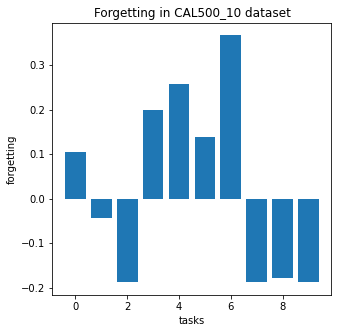

In [4]:
hparams_dict = {
    'inputs': 120,
    'outputs': 173,
    'time_constant': 300,
    'alpha_a': 0.38,
    'alpha_m': 0.07, #0.07
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 200, #2500
    'print_every': 500,
    'name': 'CAL500_10',
    'tasks': {'samples': [30]*10, 'labels': [18]*9 + [11]},
    'seed': 2,
    'add_extra_neuron': True,
    'ckpt_dir': './checkpoints/CAL500/mvmd',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

del net, hparams_dict

Training and Evaluating on task 1
Train data shape is  (20, 1, 120)
Train Labels shape is  (20, 12)
Classes trained are: 0 to 12


  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 4
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 1, class 0 neurons = 5
Class 4, class 1 neurons = 4, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 4
Class 7, class 1 neurons = 1, class 0 neurons = 5
Class 8, class 1 neurons = 3, class 0 neurons = 2
Class 9, class 1 neurons = 1, class 0 neurons = 5
Class 10, class 1 neurons = 3, class 0 neurons = 3
Class 11, class 1 neurons = 2, class 0 neurons = 5


 32%|███▏      | 63/200 [00:18<00:39,  3.48it/s]

100%|██████████| 200/200 [00:57<00:00,  3.48it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.338696  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.179     |
| macro av. jaccard   | 0.0850016 |
| micro av. precision | 0.431325  |
| macro av. precision | 0.241848  |
| micro av. recall    | 0.234293  |
| macro av. recall    | 0.16326   |
| micro av. f1        | 0.303647  |
| macro av. f1        | 0.123183  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.338696  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.179     |
| macro av. jaccard   | 0.0850016 |
| micro av. precision | 0.431325  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 3
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 1, class 0 neurons = 6
Class 4, class 1 neurons = 6, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 3
Class 6, class 1 neurons = 2, class 0 neurons = 8
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 4, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 6
Class 10, class 1 neurons = 3, class 0 neurons = 4
Class 11, class 1 neurons = 2, class 0 neurons = 7
Class 12, class 1 neurons = 1, class 0 neurons = 4
Class 13, class 1 neurons = 2, class 0 neurons = 4
Class 14, class 1 neurons = 4, class 0 neurons = 3
Class 15, class 1 neurons = 2, class 0 neurons = 4
Class 16, class 1 neurons = 4, class 0 neurons = 2
Class 17, class 1 neurons = 2, class 0 neurons = 5
Class 18, class 1 neurons = 5, class 0 neurons = 3
Class 19, class 1 neurons = 2, class 0 ne

100%|██████████| 200/200 [01:58<00:00,  1.69it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.32962   |
| zero_one_loss       | 0.99505   |
| one_error           | 0         |
| micro av. jaccard   | 0.106264  |
| macro av. jaccard   | 0.0600431 |
| micro av. precision | 0.29595   |
| macro av. precision | 0.438604  |
| micro av. recall    | 0.142216  |
| macro av. recall    | 0.142149  |
| micro av. f1        | 0.192113  |
| macro av. f1        | 0.0995986 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 24) (202, 24)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.332096  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.144981  |
| macro av. jaccard   | 0.0667377 |
| micro av. precision | 0.377072  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 3
Class 1, class 1 neurons = 1, class 0 neurons = 6
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 1, class 0 neurons = 6
Class 4, class 1 neurons = 6, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 3
Class 6, class 1 neurons = 2, class 0 neurons = 8
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 4, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 6
Class 10, class 1 neurons = 3, class 0 neurons = 4
Class 11, class 1 neurons = 2, class 0 neurons = 7
Class 12, class 1 neurons = 1, class 0 neurons = 4
Class 13, class 1 neurons = 2, class 0 neurons = 4
Class 14, class 1 neurons = 4, class 0 neurons = 3
Class 15, class 1 neurons = 2, class 0 neurons = 5
Class 16, class 1 neurons = 4, class 0 neurons = 2
Class 17, class 1 neurons = 2, class 0 neurons = 6
Class 18, class 1 neurons = 5, class 0 neurons = 3
Class 19, class 1 neurons = 2, class 0 ne

100%|██████████| 200/200 [02:42<00:00,  1.23it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.245875   |
| zero_one_loss       | 0.915842   |
| one_error           | 0          |
| micro av. jaccard   | 0.00500835 |
| macro av. jaccard   | 0.00281561 |
| micro av. precision | 0.6        |
| macro av. precision | 0.166667   |
| micro av. recall    | 0.00502513 |
| macro av. recall    | 0.00281561 |
| micro av. f1        | 0.00996678 |
| macro av. f1        | 0.00553023 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 36) (202, 36)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.307618  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.114761  |
| macro av. jaccard   | 0.0412284 |
| micro av. precision | 0.36802  

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 3
Class 1, class 1 neurons = 1, class 0 neurons = 7
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 1, class 0 neurons = 6
Class 4, class 1 neurons = 7, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 3
Class 6, class 1 neurons = 2, class 0 neurons = 9
Class 7, class 1 neurons = 1, class 0 neurons = 6
Class 8, class 1 neurons = 4, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 6
Class 10, class 1 neurons = 3, class 0 neurons = 5
Class 11, class 1 neurons = 2, class 0 neurons = 7
Class 12, class 1 neurons = 1, class 0 neurons = 6
Class 13, class 1 neurons = 2, class 0 neurons = 4
Class 14, class 1 neurons = 4, class 0 neurons = 4
Class 15, class 1 neurons = 3, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 2
Class 17, class 1 neurons = 2, class 0 neurons = 7
Class 18, class 1 neurons = 5, class 0 neurons = 4
Class 19, class 1 neurons = 2, class 0 ne

100%|██████████| 200/200 [03:40<00:00,  1.10s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0313531 |
| zero_one_loss       | 0.326733  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 48) (202, 48)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.239377  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.112428  |
| macro av. jaccard   | 0.0304057 |
| micro av. precision | 0.363861  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 4
Class 1, class 1 neurons = 1, class 0 neurons = 9
Class 2, class 1 neurons = 3, class 0 neurons = 3
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 8, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 4
Class 6, class 1 neurons = 2, class 0 neurons = 10
Class 7, class 1 neurons = 1, class 0 neurons = 7
Class 8, class 1 neurons = 5, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 7
Class 10, class 1 neurons = 3, class 0 neurons = 6
Class 11, class 1 neurons = 2, class 0 neurons = 8
Class 12, class 1 neurons = 1, class 0 neurons = 8
Class 13, class 1 neurons = 2, class 0 neurons = 5
Class 14, class 1 neurons = 4, class 0 neurons = 5
Class 15, class 1 neurons = 4, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 3
Class 17, class 1 neurons = 2, class 0 neurons = 8
Class 18, class 1 neurons = 5, class 0 neurons = 5
Class 19, class 1 neurons = 2, class 0 n

100%|██████████| 200/200 [04:49<00:00,  1.45s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.049505 |
| zero_one_loss       | 0.49505  |
| one_error           | 0        |
| micro av. jaccard   | 0        |
| macro av. jaccard   | 0        |
| micro av. precision | 0        |
| macro av. precision | 0        |
| micro av. recall    | 0        |
| macro av. recall    | 0        |
| micro av. f1        | 0        |
| macro av. f1        | 0        |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 60) (202, 60)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.201073  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.10798   |
| macro av. jaccard   | 0.0243871 |
| micro av. precision | 0.366005  |
| macro av. precision |

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 4
Class 1, class 1 neurons = 1, class 0 neurons = 9
Class 2, class 1 neurons = 3, class 0 neurons = 3
Class 3, class 1 neurons = 1, class 0 neurons = 7
Class 4, class 1 neurons = 8, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 4
Class 6, class 1 neurons = 2, class 0 neurons = 10
Class 7, class 1 neurons = 1, class 0 neurons = 7
Class 8, class 1 neurons = 5, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 7
Class 10, class 1 neurons = 3, class 0 neurons = 6
Class 11, class 1 neurons = 2, class 0 neurons = 8
Class 12, class 1 neurons = 1, class 0 neurons = 8
Class 13, class 1 neurons = 2, class 0 neurons = 6
Class 14, class 1 neurons = 4, class 0 neurons = 5
Class 15, class 1 neurons = 4, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 3
Class 17, class 1 neurons = 2, class 0 neurons = 8
Class 18, class 1 neurons = 5, class 0 neurons = 5
Class 19, class 1 neurons = 2, class 0 n

100%|██████████| 200/200 [05:45<00:00,  1.73s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.192244  |
| zero_one_loss       | 0.910891  |
| one_error           | 0         |
| micro av. jaccard   | 0.296073  |
| macro av. jaccard   | 0.0865005 |
| micro av. precision | 0.470024  |
| macro av. precision | 0.10303   |
| micro av. recall    | 0.444444  |
| macro av. recall    | 0.168376  |
| micro av. f1        | 0.456876  |
| macro av. f1        | 0.119835  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 72) (202, 72)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.199601  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.144667  |
| macro av. jaccard   | 0.0347394 |
| micro av. precision | 0.401472  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 4
Class 1, class 1 neurons = 1, class 0 neurons = 10
Class 2, class 1 neurons = 3, class 0 neurons = 3
Class 3, class 1 neurons = 1, class 0 neurons = 8
Class 4, class 1 neurons = 9, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 4
Class 6, class 1 neurons = 2, class 0 neurons = 11
Class 7, class 1 neurons = 1, class 0 neurons = 8
Class 8, class 1 neurons = 5, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 8
Class 10, class 1 neurons = 3, class 0 neurons = 7
Class 11, class 1 neurons = 2, class 0 neurons = 9
Class 12, class 1 neurons = 1, class 0 neurons = 9
Class 13, class 1 neurons = 2, class 0 neurons = 6
Class 14, class 1 neurons = 4, class 0 neurons = 5
Class 15, class 1 neurons = 4, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 3
Class 17, class 1 neurons = 2, class 0 neurons = 9
Class 18, class 1 neurons = 5, class 0 neurons = 5
Class 19, class 1 neurons = 2, class 0 

100%|██████████| 200/200 [07:01<00:00,  2.11s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.122525  |
| zero_one_loss       | 0.787129  |
| one_error           | 0         |
| micro av. jaccard   | 0.2575    |
| macro av. jaccard   | 0.0473545 |
| micro av. precision | 0.620482  |
| macro av. precision | 0.0659259 |
| micro av. recall    | 0.305638  |
| macro av. recall    | 0.0633701 |
| micro av. f1        | 0.409543  |
| macro av. f1        | 0.0630489 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 84) (202, 84)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.187883  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.15706   |
| macro av. jaccard   | 0.0357355 |
| micro av. precision | 0.431373  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 5
Class 1, class 1 neurons = 1, class 0 neurons = 13
Class 2, class 1 neurons = 3, class 0 neurons = 4
Class 3, class 1 neurons = 1, class 0 neurons = 10
Class 4, class 1 neurons = 11, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 5
Class 6, class 1 neurons = 2, class 0 neurons = 13
Class 7, class 1 neurons = 1, class 0 neurons = 10
Class 8, class 1 neurons = 6, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 10
Class 10, class 1 neurons = 3, class 0 neurons = 9
Class 11, class 1 neurons = 2, class 0 neurons = 11
Class 12, class 1 neurons = 1, class 0 neurons = 11
Class 13, class 1 neurons = 2, class 0 neurons = 7
Class 14, class 1 neurons = 4, class 0 neurons = 7
Class 15, class 1 neurons = 6, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 4
Class 17, class 1 neurons = 2, class 0 neurons = 11
Class 18, class 1 neurons = 5, class 0 neurons = 6
Class 19, class 1 neurons = 2, c

100%|██████████| 200/200 [09:00<00:00,  2.70s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.151403  |
| zero_one_loss       | 0.910891  |
| one_error           | 0         |
| micro av. jaccard   | 0.0417755 |
| macro av. jaccard   | 0.0177887 |
| micro av. precision | 0.313725  |
| macro av. precision | 0.149074  |
| micro av. recall    | 0.045977  |
| macro av. recall    | 0.0254258 |
| micro av. f1        | 0.0802005 |
| macro av. f1        | 0.0319017 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 96) (202, 96)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.181209  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.155288  |
| macro av. jaccard   | 0.034856  |
| micro av. precision | 0.442769  |
| macro av

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 5
Class 1, class 1 neurons = 1, class 0 neurons = 15
Class 2, class 1 neurons = 3, class 0 neurons = 4
Class 3, class 1 neurons = 1, class 0 neurons = 10
Class 4, class 1 neurons = 12, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 5
Class 6, class 1 neurons = 2, class 0 neurons = 14
Class 7, class 1 neurons = 1, class 0 neurons = 10
Class 8, class 1 neurons = 6, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 10
Class 10, class 1 neurons = 3, class 0 neurons = 10
Class 11, class 1 neurons = 2, class 0 neurons = 11
Class 12, class 1 neurons = 1, class 0 neurons = 12
Class 13, class 1 neurons = 2, class 0 neurons = 7
Class 14, class 1 neurons = 4, class 0 neurons = 7
Class 15, class 1 neurons = 6, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 4
Class 17, class 1 neurons = 2, class 0 neurons = 11
Class 18, class 1 neurons = 5, class 0 neurons = 6
Class 19, class 1 neurons = 2, 

100%|██████████| 200/200 [10:25<00:00,  3.13s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.278878 |
| zero_one_loss       | 0.985149 |
| one_error           | 0        |
| micro av. jaccard   | 0.269978 |
| macro av. jaccard   | 0.11585  |
| micro av. precision | 0.44484  |
| macro av. precision | 0.21031  |
| micro av. recall    | 0.407166 |
| macro av. recall    | 0.224417 |
| micro av. f1        | 0.42517  |
| macro av. f1        | 0.164077 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 108) (202, 108)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.191419  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.174377  |
| macro av. jaccard   | 0.0419613 |
| micro av. precision | 0.44568   |
| macro av. precision

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 5
Class 1, class 1 neurons = 1, class 0 neurons = 16
Class 2, class 1 neurons = 3, class 0 neurons = 4
Class 3, class 1 neurons = 1, class 0 neurons = 11
Class 4, class 1 neurons = 13, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 5
Class 6, class 1 neurons = 2, class 0 neurons = 14
Class 7, class 1 neurons = 1, class 0 neurons = 11
Class 8, class 1 neurons = 6, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 11
Class 10, class 1 neurons = 3, class 0 neurons = 11
Class 11, class 1 neurons = 2, class 0 neurons = 12
Class 12, class 1 neurons = 1, class 0 neurons = 13
Class 13, class 1 neurons = 2, class 0 neurons = 7
Class 14, class 1 neurons = 4, class 0 neurons = 7
Class 15, class 1 neurons = 6, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 4
Class 17, class 1 neurons = 2, class 0 neurons = 12
Class 18, class 1 neurons = 5, class 0 neurons = 6
Class 19, class 1 neurons = 2, 

100%|██████████| 200/200 [11:48<00:00,  3.54s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.20462  |
| zero_one_loss       | 0.970297 |
| one_error           | 0        |
| micro av. jaccard   | 0.437642 |
| macro av. jaccard   | 0.165332 |
| micro av. precision | 0.703097 |
| macro av. precision | 0.212666 |
| micro av. recall    | 0.536857 |
| macro av. recall    | 0.223208 |
| micro av. f1        | 0.608833 |
| macro av. f1        | 0.196751 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 120) (202, 120)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.192739  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.215581  |
| macro av. jaccard   | 0.0540054 |
| micro av. precision | 0.501563  |
| macro av. precision

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 6
Class 1, class 1 neurons = 1, class 0 neurons = 19
Class 2, class 1 neurons = 3, class 0 neurons = 5
Class 3, class 1 neurons = 1, class 0 neurons = 12
Class 4, class 1 neurons = 15, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 6
Class 6, class 1 neurons = 2, class 0 neurons = 15
Class 7, class 1 neurons = 1, class 0 neurons = 12
Class 8, class 1 neurons = 7, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 12
Class 10, class 1 neurons = 3, class 0 neurons = 12
Class 11, class 1 neurons = 2, class 0 neurons = 13
Class 12, class 1 neurons = 1, class 0 neurons = 14
Class 13, class 1 neurons = 2, class 0 neurons = 9
Class 14, class 1 neurons = 4, class 0 neurons = 8
Class 15, class 1 neurons = 7, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 5
Class 17, class 1 neurons = 2, class 0 neurons = 13
Class 18, class 1 neurons = 5, class 0 neurons = 7
Class 19, class 1 neurons = 2, 

100%|██████████| 200/200 [16:26<00:00,  4.93s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0820957 |
| zero_one_loss       | 0.633663  |
| one_error           | 0         |
| micro av. jaccard   | 0.0787037 |
| macro av. jaccard   | 0.0127628 |
| micro av. precision | 0.223684  |
| macro av. precision | 0.0188889 |
| micro av. recall    | 0.10828   |
| macro av. recall    | 0.0267296 |
| micro av. f1        | 0.145923  |
| macro av. f1        | 0.0221354 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 132) (202, 132)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.182306  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.215968  |
| macro av. jaccard   | 0.0508677 |
| micro av. precision | 0.495559  |
| macro 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 6
Class 1, class 1 neurons = 1, class 0 neurons = 19
Class 2, class 1 neurons = 3, class 0 neurons = 5
Class 3, class 1 neurons = 1, class 0 neurons = 12
Class 4, class 1 neurons = 15, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 6
Class 6, class 1 neurons = 2, class 0 neurons = 15
Class 7, class 1 neurons = 1, class 0 neurons = 12
Class 8, class 1 neurons = 7, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 12
Class 10, class 1 neurons = 3, class 0 neurons = 12
Class 11, class 1 neurons = 2, class 0 neurons = 13
Class 12, class 1 neurons = 1, class 0 neurons = 14
Class 13, class 1 neurons = 2, class 0 neurons = 9
Class 14, class 1 neurons = 4, class 0 neurons = 8
Class 15, class 1 neurons = 7, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 5
Class 17, class 1 neurons = 2, class 0 neurons = 13
Class 18, class 1 neurons = 5, class 0 neurons = 7
Class 19, class 1 neurons = 2, 

100%|██████████| 200/200 [17:50<00:00,  5.35s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0540429 |
| zero_one_loss       | 0.415842  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 144) (202, 144)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.170345  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.211113  |
| macro av. jaccard   | 0.0459188 |
| micro av. precision | 0.502463  |
| macro 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 22
Class 2, class 1 neurons = 3, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 15
Class 4, class 1 neurons = 18, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 8
Class 6, class 1 neurons = 2, class 0 neurons = 17
Class 7, class 1 neurons = 1, class 0 neurons = 15
Class 8, class 1 neurons = 8, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 15
Class 10, class 1 neurons = 3, class 0 neurons = 14
Class 11, class 1 neurons = 2, class 0 neurons = 14
Class 12, class 1 neurons = 1, class 0 neurons = 17
Class 13, class 1 neurons = 2, class 0 neurons = 11
Class 14, class 1 neurons = 4, class 0 neurons = 9
Class 15, class 1 neurons = 7, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 6
Class 17, class 1 neurons = 2, class 0 neurons = 14
Class 18, class 1 neurons = 5, class 0 neurons = 8
Class 19, class 1 neurons = 2,

100%|██████████| 200/200 [21:34<00:00,  6.47s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0544554 |
| zero_one_loss       | 0.480198  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 156) (202, 156)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.16124   |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.20659   |
| macro av. jaccard   | 0.0420667 |
| micro av. precision | 0.503425  |
| macro 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 25
Class 2, class 1 neurons = 3, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 16
Class 4, class 1 neurons = 20, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 8
Class 6, class 1 neurons = 2, class 0 neurons = 18
Class 7, class 1 neurons = 1, class 0 neurons = 16
Class 8, class 1 neurons = 8, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 16
Class 10, class 1 neurons = 3, class 0 neurons = 14
Class 11, class 1 neurons = 2, class 0 neurons = 14
Class 12, class 1 neurons = 1, class 0 neurons = 17
Class 13, class 1 neurons = 2, class 0 neurons = 11
Class 14, class 1 neurons = 4, class 0 neurons = 9
Class 15, class 1 neurons = 7, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 6
Class 17, class 1 neurons = 2, class 0 neurons = 14
Class 18, class 1 neurons = 5, class 0 neurons = 8
Class 19, class 1 neurons = 2,

100%|██████████| 200/200 [24:11<00:00,  7.26s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 12) (202, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0433168 |
| zero_one_loss       | 0.465347  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 168) (202, 168)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.152758  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.203442  |
| macro av. jaccard   | 0.0390914 |
| micro av. precision | 0.503614  |
| macro 

  0%|          | 0/200 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 25
Class 2, class 1 neurons = 3, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 16
Class 4, class 1 neurons = 20, class 0 neurons = 1
Class 5, class 1 neurons = 4, class 0 neurons = 8
Class 6, class 1 neurons = 2, class 0 neurons = 18
Class 7, class 1 neurons = 1, class 0 neurons = 16
Class 8, class 1 neurons = 8, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 16
Class 10, class 1 neurons = 3, class 0 neurons = 14
Class 11, class 1 neurons = 2, class 0 neurons = 14
Class 12, class 1 neurons = 1, class 0 neurons = 18
Class 13, class 1 neurons = 2, class 0 neurons = 11
Class 14, class 1 neurons = 4, class 0 neurons = 9
Class 15, class 1 neurons = 7, class 0 neurons = 7
Class 16, class 1 neurons = 4, class 0 neurons = 6
Class 17, class 1 neurons = 2, class 0 neurons = 14
Class 18, class 1 neurons = 5, class 0 neurons = 8
Class 19, class 1 neurons = 2,

100%|██████████| 200/200 [24:56<00:00,  7.48s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 5) (202, 5)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.029703 |
| zero_one_loss       | 0.133663 |
| one_error           | 0        |
| micro av. jaccard   | 0        |
| macro av. jaccard   | 0        |
| micro av. precision | 0        |
| macro av. precision | 0        |
| micro av. recall    | 0        |
| macro av. recall    | 0        |
| micro av. f1        | 0        |
| macro av. f1        | 0        |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 173) (202, 173)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.149173  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.202539  |
| macro av. jaccard   | 0.0379616 |
| micro av. precision | 0.503805  |
| macro av. precision |

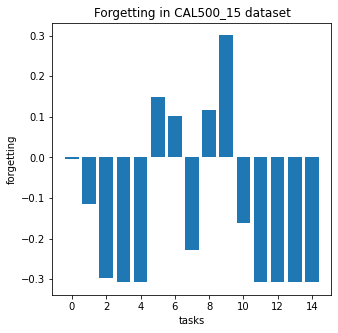

In [5]:
hparams_dict = {
    'inputs': 120,
    'outputs': 173,
    'time_constant': 300,
    'alpha_a': 0.38,
    'alpha_m': 0.07, #0.07
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 200, #2500
    'print_every': 500,
    'name': 'CAL500_15',
    'tasks': {'samples': [20]*15, 'labels': [12]*14 + [5]},
    'seed': 2,
    'add_extra_neuron': True,
    'ckpt_dir': './checkpoints/CAL500/mvmd',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

del net, hparams_dict